# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
"https://www.kaggle.com/datasets/arjunbhasin2013/ccdata"
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak memiliki label atau kelas.
   - **Jumlah Baris**: 8950 baris.
   - **Tipe Data**: Mengandung data numerikal (BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, dll.).

3. **Pembatasan**:  
    Dataset ini tidak digunakan dalam latihan customer segmentation.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print("Jumlah Baris dan Kolom:", df.shape)

print("\nTipe Data:\n", df.dtypes)

print("\nStatistik Deskriptif:\n", df.describe())

Jumlah Baris dan Kolom: (8950, 18)

Tipe Data:
 CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Statistik Deskriptif:
             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.00

In [4]:
print("Missing Values:\n", df.isnull().sum())

df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)

Missing Values:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


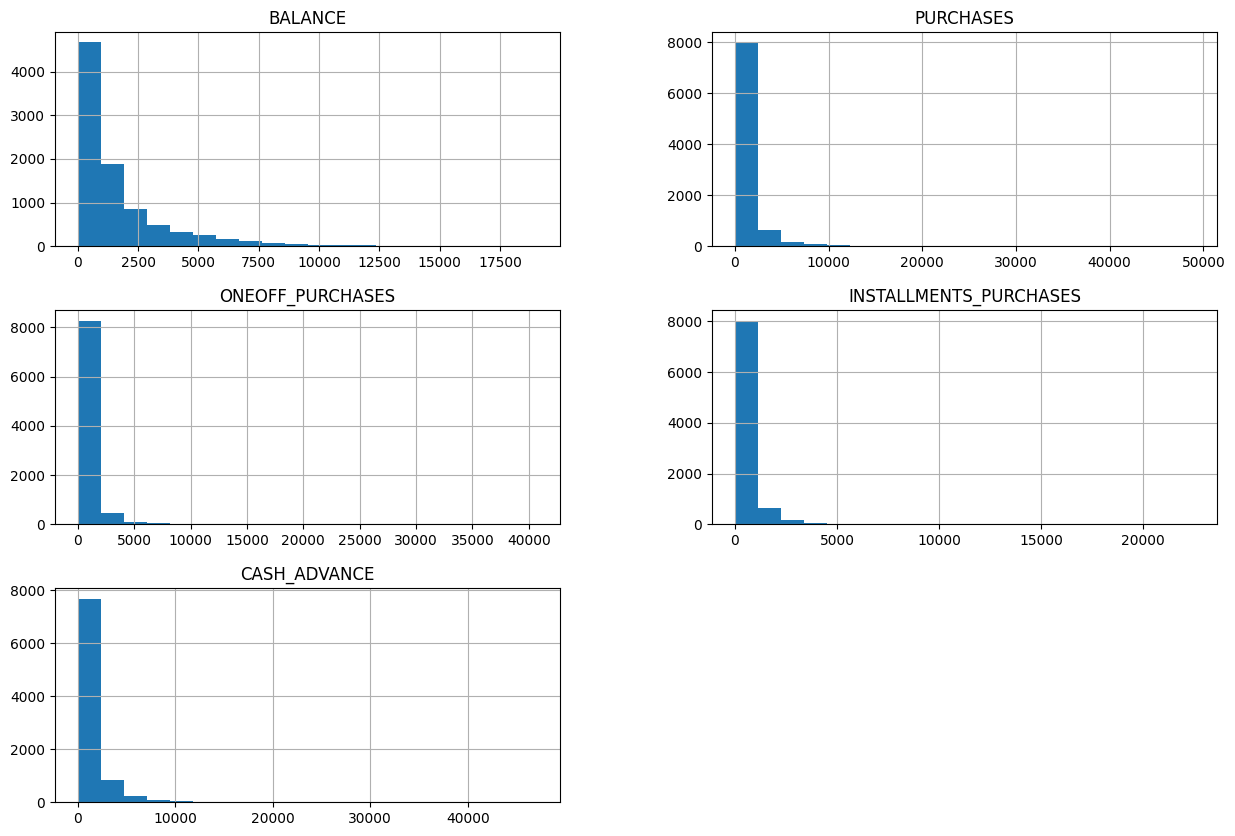

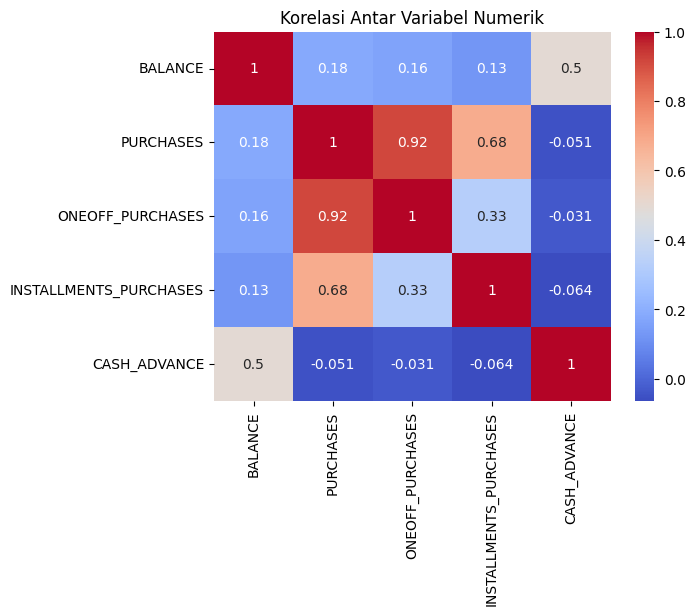

In [5]:
df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']].hist(bins=20, figsize=(15, 10))
plt.show()

corr = df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

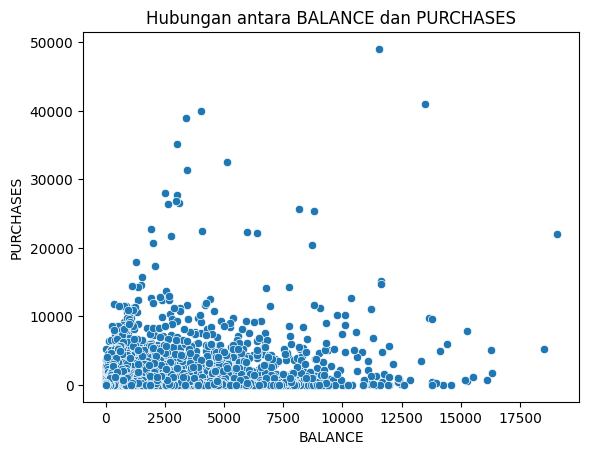

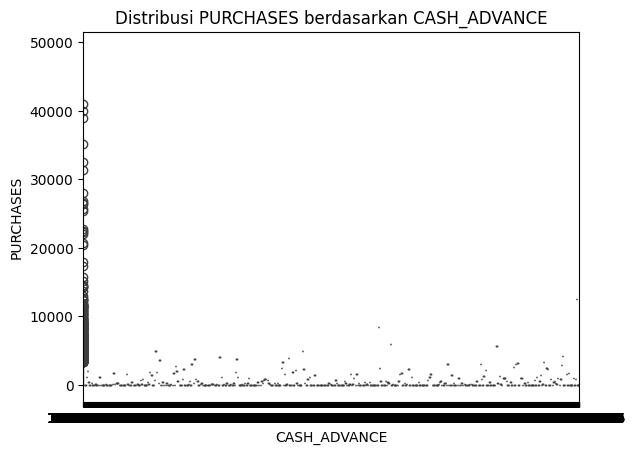

In [6]:
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES')
plt.title('Hubungan antara BALANCE dan PURCHASES')
plt.show()

sns.boxplot(data=df, x='CASH_ADVANCE', y='PURCHASES')
plt.title('Distribusi PURCHASES berdasarkan CASH_ADVANCE')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

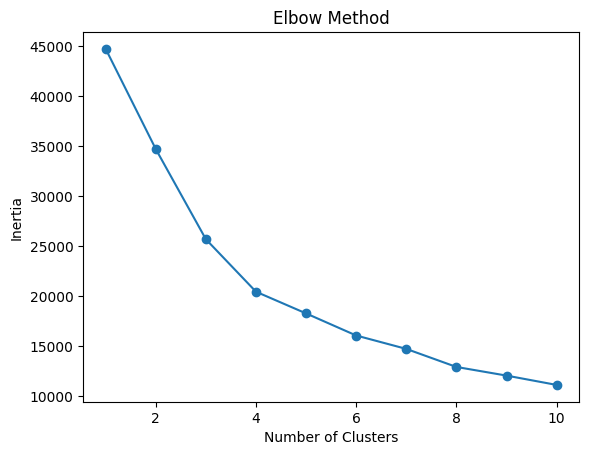

Silhouette Score (MiniBatchKMeans): 0.3063964706799916


In [10]:
# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette Score

mbkmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
df['Cluster'] = mbkmeans.fit_predict(X_scaled)

sample_size = 1000
indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_sample = X_scaled[indices]
labels_sample = df['Cluster'].iloc[indices]

silhouette_avg = silhouette_score(X_sample, labels_sample)
print("Silhouette Score (MiniBatchKMeans):", silhouette_avg)

## **c. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

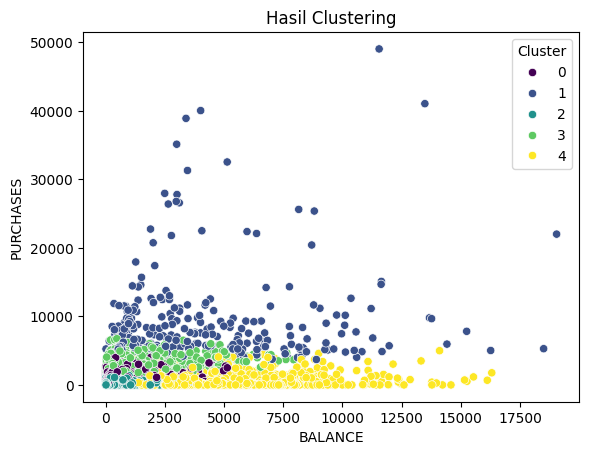

In [11]:
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='Cluster', palette='viridis')
plt.title('Hasil Clustering')
plt.show()

## **d. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [12]:
X_original = scaler.inverse_transform(X_scaled)
df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']] = X_original

cluster_summary = df.groupby('Cluster').agg({
    'BALANCE': ['mean', 'min', 'max'],
    'PURCHASES': ['mean', 'min', 'max'],
    'ONEOFF_PURCHASES': ['mean', 'min', 'max'],
    'INSTALLMENTS_PURCHASES': ['mean', 'min', 'max'],
    'CASH_ADVANCE': ['mean', 'min', 'max']
})
display(cluster_summary)

BALANCE                             PURCHASES                     \
                mean        min           max         mean      min       max   
Cluster                                                                         
0         779.679200   0.000000   5747.761139  1364.929301   205.06   4235.28   
1        4125.740109  12.659909  19043.138560  9380.516618  3507.35  49039.57   
2         775.942907   0.000000   4413.461158   276.408814     0.00   1480.76   
3        1510.668256   0.000000   7938.559134  3002.954160  1189.52   6856.25   
4        4678.759476  78.114579  16304.889250   493.959050     0.00   5197.22   

        ONEOFF_PURCHASES                   INSTALLMENTS_PURCHASES          \
                    mean     min       max                   mean     min   
Cluster                                                                     
0             289.513905     0.0   1295.84            1076.337140  256.54   
1            6028.962169     0.0  40761.25            3353.760331    0.00   
2             177.403364     0.0   1480.76              99.135234    0.00   
3            2401.568556  1049.3   6856.25             601.446099    0.00   
4             294.044553     0.0   4020.33             199.986045    0.00   

                  CASH_ADVANCE                     
              max         mean  min           max  
Cluster                                            
0         4127.83   166.814709  0.0   3795.101004  
1        22500.00   781.571735  0.0  19513.474830  
2          581.43   422.482999  0.0   4262.120108  
3         2902.75   285.971280  0.0   5632.549503  
4         3887.00  4185.638214  0.0  47137.211760

Cluster 0 : 
- BALANCE: Rata-rata 779.68 (min: 0.00, max: 5747.76)
- PURCHASES: Rata-rata 1364.93 (min: 205.06, max: 4235.28)
- ONEOFF_PURCHASES: Rata-rata 289.51 (min: 0.00, max: 1295.84)
- INSTALLMENTS_PURCHASES: Rata-rata 1076.34 (min: 256.54, max: 4127.83)
- CASH_ADVANCE: Rata-rata 166.81 (min: 0.00, max: 3795.10) <br>
**Analisis:**
Cluster ini terdiri dari pelanggan dengan saldo (BALANCE) menengah dan pengeluaran (PURCHASES) yang cukup tinggi. Mereka cenderung melakukan pembelian cicilan (INSTALLMENTS_PURCHASES) dalam jumlah besar, tetapi pembelian sekaligus (ONEOFF_PURCHASES) dalam jumlah sedang. Penggunaan CASH_ADVANCE relatif rendah, menunjukkan bahwa mereka lebih memilih menggunakan saldo mereka untuk pembelian langsung daripada mengambil uang tunai di muka. Insight: Pelanggan ini mungkin adalah pembeli reguler yang memanfaatkan fasilitas cicilan dan memiliki kebiasaan belanja yang stabil.

Cluster 1 : 
- BALANCE: Rata-rata 4125.74 (min: 12.66, max: 19043.14)
- PURCHASES: Rata-rata 9380.52 (min: 3507.35, max: 49039.57)
- ONEOFF_PURCHASES: Rata-rata 6028.96 (min: 0.00, max: 40761.25)
- INSTALLMENTS_PURCHASES: Rata-rata 3353.76 (min: 0.00, max: 22500.00)
- CASH_ADVANCE: Rata-rata 781.57 (min: 0.00, max: 19513.47) <br>
**Analisis:**
Cluster ini terdiri dari pelanggan dengan saldo (BALANCE) tinggi dan pengeluaran (PURCHASES) yang sangat tinggi. Mereka cenderung melakukan pembelian sekaligus (ONEOFF_PURCHASES) dalam jumlah besar, serta pembelian cicilan (INSTALLMENTS_PURCHASES) yang signifikan. Penggunaan CASH_ADVANCE sedang, menunjukkan bahwa mereka memanfaatkan kedua opsi (pembelian langsung dan uang tunai di muka). Insight: Pelanggan ini mungkin adalah pembeli premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

Cluster 2 : 
- BALANCE: Rata-rata 775.94 (min: 0.00, max: 4413.46)
- PURCHASES: Rata-rata 276.41 (min: 0.00, max: 1480.76)
- ONEOFF_PURCHASES: Rata-rata 177.40 (min: 0.00, max: 1480.76)
- INSTALLMENTS_PURCHASES: Rata-rata 99.14 (min: 0.00, max: 581.43)
- CASH_ADVANCE: Rata-rata 422.48 (min: 0.00, max: 4262.12) <br>
**Analisis:**
Cluster ini terdiri dari pelanggan dengan saldo (BALANCE) menengah dan pengeluaran (PURCHASES) yang rendah. Mereka jarang melakukan pembelian sekaligus (ONEOFF_PURCHASES) atau cicilan (INSTALLMENTS_PURCHASES). Penggunaan CASH_ADVANCE relatif tinggi, menunjukkan bahwa mereka lebih memilih mengambil uang tunai di muka daripada melakukan pembelian langsung. Insight: Pelanggan ini mungkin adalah penabung yang jarang berbelanja tetapi sering mengambil uang tunai untuk kebutuhan lain, seperti investasi atau kebutuhan darurat.

Cluster 3 :
- BALANCE: Rata-rata 1510.67 (min: 0.00, max: 7938.56)
- PURCHASES: Rata-rata 3002.95 (min: 1189.52, max: 6856.25)
- ONEOFF_PURCHASES: Rata-rata 2401.57 (min: 1049.30, max: 6856.25)
- INSTALLMENTS_PURCHASES: Rata-rata 601.45 (min: 0.00, max: 2902.75)
- CASH_ADVANCE: Rata-rata 285.97 (min: 0.00, max: 5632.55) <br>
**Analisis:**
Cluster ini terdiri dari pelanggan dengan saldo (BALANCE) menengah dan pengeluaran (PURCHASES) yang tinggi. Mereka cenderung melakukan pembelian sekaligus (ONEOFF_PURCHASES) dalam jumlah besar, tetapi pembelian cicilan (INSTALLMENTS_PURCHASES) dalam jumlah sedang. Penggunaan CASH_ADVANCE sedang, menunjukkan bahwa mereka memanfaatkan kedua opsi (pembelian langsung dan uang tunai di muka). Insight: Pelanggan ini mungkin adalah pembeli yang fleksibel dan memanfaatkan berbagai opsi pembayaran, serta memiliki kebiasaan belanja yang terencana.

Cluster 4 :
- BALANCE: Rata-rata 4678.76 (min: 78.11, max: 16304.89)
- PURCHASES: Rata-rata 493.96 (min: 0.00, max: 5197.22)
- ONEOFF_PURCHASES: Rata-rata 294.04 (min: 0.00, max: 4020.33)
- INSTALLMENTS_PURCHASES: Rata-rata 199.99 (min: 0.00, max: 3887.00)
- CASH_ADVANCE: Rata-rata 4185.64 (min: 0.00, max: 47137.21) <br>
**Analisis:**
Cluster ini terdiri dari pelanggan dengan saldo (BALANCE) tinggi tetapi pengeluaran (PURCHASES) yang rendah. Mereka jarang melakukan pembelian sekaligus (ONEOFF_PURCHASES) atau cicilan (INSTALLMENTS_PURCHASES). Penggunaan CASH_ADVANCE sangat tinggi, menunjukkan bahwa mereka lebih memilih mengambil uang tunai di muka daripada melakukan pembelian langsung. Insight: Pelanggan ini mungkin adalah penabung yang jarang berbelanja tetapi sering mengambil uang tunai untuk kebutuhan lain, seperti investasi atau kebutuhan darurat.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [13]:
df.to_csv('CC_GENERAL_Labeled.csv', index=False)